In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2018-01-04"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2018_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-01-04   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6675    ÏÇ¨ÏÉÅÍµ¨   8070    ÏÇ¨ÏÉÅÍµ¨   
1   2018-01-04     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300    ÏÇ¨ÏÉÅÍµ¨  10710    ÏÇ¨ÏÉÅÍµ¨   
2   2018-01-04     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2780    ÏÇ¨ÏÉÅÍµ¨   2790    ÏÇ¨ÏÉÅÍµ¨   
3   2018-01-04    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7609    ÏÇ¨ÏÉÅÍµ¨   8500    ÏÇ¨ÏÉÅÍµ¨   
4   2018-01-04     ÎåÄÌåå                      1.0„éè   2877    ÏÇ¨ÏÉÅÍµ¨   3790    ÏÇ¨ÏÉÅÍµ¨   
5   2018-01-04   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7200    ÏÇ¨ÏÉÅÍµ¨   8950    ÏÇ¨ÏÉÅÍµ¨   
6   2018-01-04     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365    ÏÇ¨ÏÉÅÍµ¨   4365    ÏÇ¨ÏÉÅÍµ¨   
7   2018-01-04     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÏÉÅÍµ¨    676    ÏÇ¨ÏÉÅÍµ¨   
8   2018-01-04     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410    ÏÇ¨ÏÉÅÍµ¨   1500    ÏÇ¨ÏÉÅÍµ¨   
9   2018-01-04      Î¨¥                   2.0„éè 1Í∞ú   1978    ÏÇ¨ÏÉÅÍµ¨   1984    ÏÇ¨ÏÉÅÍµ¨   
10  2018-01-04    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
11  2018-01-04     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3600    ÏÇ¨ÏÉÅÍµ¨   3900    ÏÇ¨ÏÉÅÍµ¨   
12  2018-01-04      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  17249    ÏÇ¨ÏÉÅÍµ¨  33921    ÏÇ¨ÏÉÅÍµ¨   
13  2018-01-04     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2209    ÏÇ¨ÏÉÅÍµ¨   2241    ÏÇ¨ÏÉÅÍµ¨   
14  2018-01-04  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490    ÏÇ¨ÏÉÅÍµ¨   6562    ÏÇ¨ÏÉÅÍµ¨   
15  2018-01-04   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14800    ÏÇ¨ÏÉÅÍµ¨  14800    ÏÇ¨ÏÉÅÍµ¨   
16  2018-01-04     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  13344    ÏÇ¨ÏÉÅÍµ¨  13419    ÏÇ¨ÏÉÅÍµ¨   
17  2018-01-04    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1650    ÏÇ¨ÏÉÅÍµ¨   3675    ÏÇ¨ÏÉÅÍµ¨   
18  2018-01-04     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÏÉÅÍµ¨   1630    ÏÇ¨ÏÉÅÍµ¨   
19  2018-01-04     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÏÉÅÍµ¨   1380    ÏÇ¨ÏÉÅÍµ¨   
20  2018-01-04    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   7188    ÏÇ¨ÏÉÅÍµ¨   8200    ÏÇ¨ÏÉÅÍµ¨   
21  2018-01-04      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39900    ÏÇ¨ÏÉÅÍµ¨  43900    ÏÇ¨ÏÉÅÍµ¨   
22  2018-01-04     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1805    ÏÇ¨ÏÉÅÍµ¨   2088    ÏÇ¨ÏÉÅÍµ¨   
23  2018-01-04     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÏÉÅÍµ¨    730    ÏÇ¨ÏÉÅÍµ¨   
24  2018-01-04    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   5980    ÏÇ¨ÏÉÅÍµ¨   7290    ÏÇ¨ÏÉÅÍµ¨   
25  2018-01-04   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
26  2018-01-04     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2380    ÏÇ¨ÏÉÅÍµ¨   2900    ÏÇ¨ÏÉÅÍµ¨   
27  2018-01-04    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13377    ÏÇ¨ÏÉÅÍµ¨  18562    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1395    20.9%   7,373  
1    4410    70.0%   8,505  
2      10    0.36%   2,785  
3     891   11.71%   8,055  
4     913   31.73%   3,334  
5    1750   24.31%   8,075  
6       0     0.0%   4,365  
7       0     0.0%     676  
8      90    6.38%   1,455  
9       6     0.3%   1,981  
10    210    6.82%   3,185  
11    300    8.33%   3,750  
12  16672   96.65%  25,585  
13     32    1.45%   2,225  
14     72    1.11%   6,526  
15      0     0.0%  14,800  
16     75    0.56%  13,382  
17   2025  122.73%   2,663  
18     50    3.16%   1,605  
19    190   15.97%   1,285  
20   1012   14.08%   7,694  
21   4000   10.03%  41,900  
22    283   15.68%   1,947  
23      0     0.0%     730  
24   1310   21.91%   6,635  
25    740   29.02%   2,920  
26    520   21.85%   2,640  
27   5185   38.76%  15,970

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2018-04-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2018_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-04-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6675    ÏÇ¨ÏÉÅÍµ¨   9666    ÏÇ¨ÏÉÅÍµ¨   
1   2018-04-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300    ÏÇ¨ÏÉÅÍµ¨  10710    ÏÇ¨ÏÉÅÍµ¨   
2   2018-04-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2290    ÏÇ¨ÏÉÅÍµ¨   2780    ÏÇ¨ÏÉÅÍµ¨   
3   2018-04-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   8900    ÏÇ¨ÏÉÅÍµ¨   8990    ÏÇ¨ÏÉÅÍµ¨   
4   2018-04-12     ÎåÄÌåå                      1.0„éè   2257    ÏÇ¨ÏÉÅÍµ¨   2290    ÏÇ¨ÏÉÅÍµ¨   
5   2018-04-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7100    ÏÇ¨ÏÉÅÍµ¨  10400    ÏÇ¨ÏÉÅÍµ¨   
6   2018-04-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365    ÏÇ¨ÏÉÅÍµ¨   4365    ÏÇ¨ÏÉÅÍµ¨   
7   2018-04-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÏÉÅÍµ¨    676    ÏÇ¨ÏÉÅÍµ¨   
8   2018-04-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400    ÏÇ¨ÏÉÅÍµ¨   1410    ÏÇ¨ÏÉÅÍµ¨   
9   2018-04-12      Î¨¥                   2.0„éè 1Í∞ú   3266    ÏÇ¨ÏÉÅÍµ¨   4222    ÏÇ¨ÏÉÅÍµ¨   
10  2018-04-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
11  2018-04-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  22020    ÏÇ¨ÏÉÅÍµ¨  25410    ÏÇ¨ÏÉÅÍµ¨   
12  2018-04-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3783    ÏÇ¨ÏÉÅÍµ¨   4147    ÏÇ¨ÏÉÅÍµ¨   
13  2018-04-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490    ÏÇ¨ÏÉÅÍµ¨   6562    ÏÇ¨ÏÉÅÍµ¨   
14  2018-04-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14800    ÏÇ¨ÏÉÅÍµ¨  14800    ÏÇ¨ÏÉÅÍµ¨   
15  2018-04-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  17106    ÏÇ¨ÏÉÅÍµ¨  17892    ÏÇ¨ÏÉÅÍµ¨   
16  2018-04-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649    ÏÇ¨ÏÉÅÍµ¨   3675    ÏÇ¨ÏÉÅÍµ¨   
17  2018-04-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÏÉÅÍµ¨   1680    ÏÇ¨ÏÉÅÍµ¨   
18  2018-04-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÏÉÅÍµ¨   1380    ÏÇ¨ÏÉÅÍµ¨   
19  2018-04-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6880    ÏÇ¨ÏÉÅÍµ¨   7188    ÏÇ¨ÏÉÅÍµ¨   
20  2018-04-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  44900    ÏÇ¨ÏÉÅÍµ¨  45990    ÏÇ¨ÏÉÅÍµ¨   
21  2018-04-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1260    ÏÇ¨ÏÉÅÍµ¨   2766    ÏÇ¨ÏÉÅÍµ¨   
22  2018-04-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÏÉÅÍµ¨    730    ÏÇ¨ÏÉÅÍµ¨   
23  2018-04-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250    ÏÇ¨ÏÉÅÍµ¨   7290    ÏÇ¨ÏÉÅÍµ¨   
24  2018-04-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
25  2018-04-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3130    ÏÇ¨ÏÉÅÍµ¨   3130    ÏÇ¨ÏÉÅÍµ¨   
26  2018-04-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  15451    ÏÇ¨ÏÉÅÍµ¨  18562    ÏÇ¨ÏÉÅÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   2991   44.81%   8,171  
1   4410    70.0%   8,505  
2    490    21.4%   2,535  
3     90    1.01%   8,945  
4     33    1.46%   2,274  
5   3300   46.48%   8,750  
6      0     0.0%   4,365  
7      0     0.0%     676  
8     10    0.71%   1,405  
9    956   29.27%   3,744  
10   210    6.82%   3,185  
11  3390    15.4%  23,715  
12   364    9.62%   3,965  
13    72    1.11%   6,526  
14     0     0.0%  14,800  
15   786    4.59%  17,499  
16  2026  122.86%   2,662  
17   100    6.33%   1,630  
18   190   15.97%   1,285  
19   308    4.48%   7,034  
20  1090    2.43%  45,445  
21  1506  119.52%   2,013  
22     0     0.0%     730  
23    40    0.55%   7,270  
24   740   29.02%   2,920  
25     0     0.0%   3,130  
26  3111   20.13%  17,007

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2018-07-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2018_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-07-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8175    ÏÇ¨ÏÉÅÍµ¨   9666    ÏÇ¨ÏÉÅÍµ¨   
1   2018-07-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300    ÏÇ¨ÏÉÅÍµ¨  10710    ÏÇ¨ÏÉÅÍµ¨   
2   2018-07-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2390    ÏÇ¨ÏÉÅÍµ¨   2780    ÏÇ¨ÏÉÅÍµ¨   
3   2018-07-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6990    ÏÇ¨ÏÉÅÍµ¨   8300    ÏÇ¨ÏÉÅÍµ¨   
4   2018-07-12     ÎåÄÌåå                      1.0„éè   2828    ÏÇ¨ÏÉÅÍµ¨   2990    ÏÇ¨ÏÉÅÍµ¨   
5   2018-07-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9900    ÏÇ¨ÏÉÅÍµ¨  11400    ÏÇ¨ÏÉÅÍµ¨   
6   2018-07-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365    ÏÇ¨ÏÉÅÍµ¨   4365    ÏÇ¨ÏÉÅÍµ¨   
7   2018-07-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÏÉÅÍµ¨    676    ÏÇ¨ÏÉÅÍµ¨   
8   2018-07-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400    ÏÇ¨ÏÉÅÍµ¨   1410    ÏÇ¨ÏÉÅÍµ¨   
9   2018-07-12      Î¨¥                   2.0„éè 1Í∞ú   2117    ÏÇ¨ÏÉÅÍµ¨   2119    ÏÇ¨ÏÉÅÍµ¨   
10  2018-07-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080    ÏÇ¨ÏÉÅÍµ¨   3090    ÏÇ¨ÏÉÅÍµ¨   
11  2018-07-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8920    ÏÇ¨ÏÉÅÍµ¨   9090    ÏÇ¨ÏÉÅÍµ¨   
12  2018-07-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  24026    ÏÇ¨ÏÉÅÍµ¨  31740    ÏÇ¨ÏÉÅÍµ¨   
13  2018-07-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2151    ÏÇ¨ÏÉÅÍµ¨   2184    ÏÇ¨ÏÉÅÍµ¨   
14  2018-07-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490    ÏÇ¨ÏÉÅÍµ¨   6562    ÏÇ¨ÏÉÅÍµ¨   
15  2018-07-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14800    ÏÇ¨ÏÉÅÍµ¨  14800    ÏÇ¨ÏÉÅÍµ¨   
16  2018-07-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  11880    ÏÇ¨ÏÉÅÍµ¨  14910    ÏÇ¨ÏÉÅÍµ¨   
17  2018-07-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649    ÏÇ¨ÏÉÅÍµ¨   3675    ÏÇ¨ÏÉÅÍµ¨   
18  2018-07-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÏÉÅÍµ¨   1680    ÏÇ¨ÏÉÅÍµ¨   
19  2018-07-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÏÉÅÍµ¨   1380    ÏÇ¨ÏÉÅÍµ¨   
20  2018-07-12    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  32450    ÏÇ¨ÏÉÅÍµ¨  59000    ÏÇ¨ÏÉÅÍµ¨   
21  2018-07-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6880    ÏÇ¨ÏÉÅÍµ¨   7188    ÏÇ¨ÏÉÅÍµ¨   
22  2018-07-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  45990    ÏÇ¨ÏÉÅÍµ¨  49900    ÏÇ¨ÏÉÅÍµ¨   
23  2018-07-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1063    ÏÇ¨ÏÉÅÍµ¨   1661    ÏÇ¨ÏÉÅÍµ¨   
24  2018-07-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÏÉÅÍµ¨    730    ÏÇ¨ÏÉÅÍµ¨   
25  2018-07-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250    ÏÇ¨ÏÉÅÍµ¨   7290    ÏÇ¨ÏÉÅÍµ¨   
26  2018-07-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
27  2018-07-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2490    ÏÇ¨ÏÉÅÍµ¨   2500    ÏÇ¨ÏÉÅÍµ¨   
28  2018-07-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  15451    ÏÇ¨ÏÉÅÍµ¨  20637    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1491   18.24%   8,921  
1    4410    70.0%   8,505  
2     390   16.32%   2,585  
3    1310   18.74%   7,645  
4     162    5.73%   2,909  
5    1500   15.15%  10,650  
6       0     0.0%   4,365  
7       0     0.0%     676  
8      10    0.71%   1,405  
9       2    0.09%   2,118  
10     10    0.32%   3,085  
11    170    1.91%   9,005  
12   7714   32.11%  27,883  
13     33    1.53%   2,168  
14     72    1.11%   6,526  
15      0     0.0%  14,800  
16   3030   25.51%  13,395  
17   2026  122.86%   2,662  
18    100    6.33%   1,630  
19    190   15.97%   1,285  
20  26550   81.82%  45,725  
21    308    4.48%   7,034  
22   3910     8.5%  47,945  
23    598   56.26%   1,362  
24      0    

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2018-10-11"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2018_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-10-11   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   5925    ÏÇ¨ÏÉÅÍµ¨  11900    ÏÇ¨ÏÉÅÍµ¨   
1   2018-10-11     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë  11900    ÏÇ¨ÏÉÅÍµ¨  11900    ÏÇ¨ÏÉÅÍµ¨   
2   2018-10-11    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4639    ÏÇ¨ÏÉÅÍµ¨   6950    ÏÇ¨ÏÉÅÍµ¨   
3   2018-10-11     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2680    ÏÇ¨ÏÉÅÍµ¨   2690    ÏÇ¨ÏÉÅÍµ¨   
4   2018-10-11    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   8990    ÏÇ¨ÏÉÅÍµ¨   9800    ÏÇ¨ÏÉÅÍµ¨   
5   2018-10-11     ÎåÄÌåå                      1.0„éè   3346    ÏÇ¨ÏÉÅÍµ¨   3980    ÏÇ¨ÏÉÅÍµ¨   
6   2018-10-11   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9450    ÏÇ¨ÏÉÅÍµ¨   9900    ÏÇ¨ÏÉÅÍµ¨   
7   2018-10-11     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4253    ÏÇ¨ÏÉÅÍµ¨   4253    ÏÇ¨ÏÉÅÍµ¨   
8   2018-10-11     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ   3380    ÏÇ¨ÏÉÅÍµ¨   3380    ÏÇ¨ÏÉÅÍµ¨   
9   2018-10-11     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400    ÏÇ¨ÏÉÅÍµ¨   1410    ÏÇ¨ÏÉÅÍµ¨   
10  2018-10-11      Î¨¥                   2.0„éè 1Í∞ú   2648    ÏÇ¨ÏÉÅÍµ¨   2657    ÏÇ¨ÏÉÅÍµ¨   
11  2018-10-11    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080    ÏÇ¨ÏÉÅÍµ¨   3090    ÏÇ¨ÏÉÅÍµ¨   
12  2018-10-11     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   5000    ÏÇ¨ÏÉÅÍµ¨   6400    ÏÇ¨ÏÉÅÍµ¨   
13  2018-10-11      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  23760    ÏÇ¨ÏÉÅÍµ¨  28434    ÏÇ¨ÏÉÅÍµ¨   
14  2018-10-11     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3228    ÏÇ¨ÏÉÅÍµ¨   3877    ÏÇ¨ÏÉÅÍµ¨   
15  2018-10-11  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490    ÏÇ¨ÏÉÅÍµ¨   6562    ÏÇ¨ÏÉÅÍµ¨   
16  2018-10-11   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  12000    ÏÇ¨ÏÉÅÍµ¨  14800    ÏÇ¨ÏÉÅÍµ¨   
17  2018-10-11     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  11400    ÏÇ¨ÏÉÅÍµ¨  16107    ÏÇ¨ÏÉÅÍµ¨   
18  2018-10-11    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1980    ÏÇ¨ÏÉÅÍµ¨   2450    ÏÇ¨ÏÉÅÍµ¨   
19  2018-10-11     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÏÉÅÍµ¨   1680    ÏÇ¨ÏÉÅÍµ¨   
20  2018-10-11     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÏÉÅÍµ¨   1380    ÏÇ¨ÏÉÅÍµ¨   
21  2018-10-11    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  47450    ÏÇ¨ÏÉÅÍµ¨  54750    ÏÇ¨ÏÉÅÍµ¨   
22  2018-10-11    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÏÉÅÍµ¨   7188    ÏÇ¨ÏÉÅÍµ¨   
23  2018-10-11      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49900    ÏÇ¨ÏÉÅÍµ¨  51990    ÏÇ¨ÏÉÅÍµ¨   
24  2018-10-11     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É    996    ÏÇ¨ÏÉÅÍµ¨   1596    ÏÇ¨ÏÉÅÍµ¨   
25  2018-10-11     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÏÉÅÍµ¨    730    ÏÇ¨ÏÉÅÍµ¨   
26  2018-10-11    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250    ÏÇ¨ÏÉÅÍµ¨   7290    ÏÇ¨ÏÉÅÍµ¨   
27  2018-10-11   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
28  2018-10-11     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2190    ÏÇ¨ÏÉÅÍµ¨   2480    ÏÇ¨ÏÉÅÍµ¨   
29  2018-10-11    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  14900    ÏÇ¨ÏÉÅÍµ¨  19900    ÏÇ¨ÏÉÅÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   5975  100.84%   8,913  
1      0     0.0%  11,900  
2   2311   49.82%   5,795  
3     10    0.37%   2,685  
4    810    9.01%   9,395  
5    634   18.95%   3,663  
6    450    4.76%   9,675  
7      0     0.0%   4,253  
8      0     0.0%   3,380  
9     10    0.71%   1,405  
10     9    0.34%   2,653  
11    10    0.32%   3,085  
12  1400    28.0%   5,700  
13  4674   19.67%  26,097  
14   649   20.11%   3,553  
15    72    1.11%   6,526  
16  2800   23.33%  13,400  
17  4707   41.29%  13,754  
18   470   23.74%   2,215  
19   100    6.33%   1,630  
20   190   15.97%   1,285  
21  7300   15.3

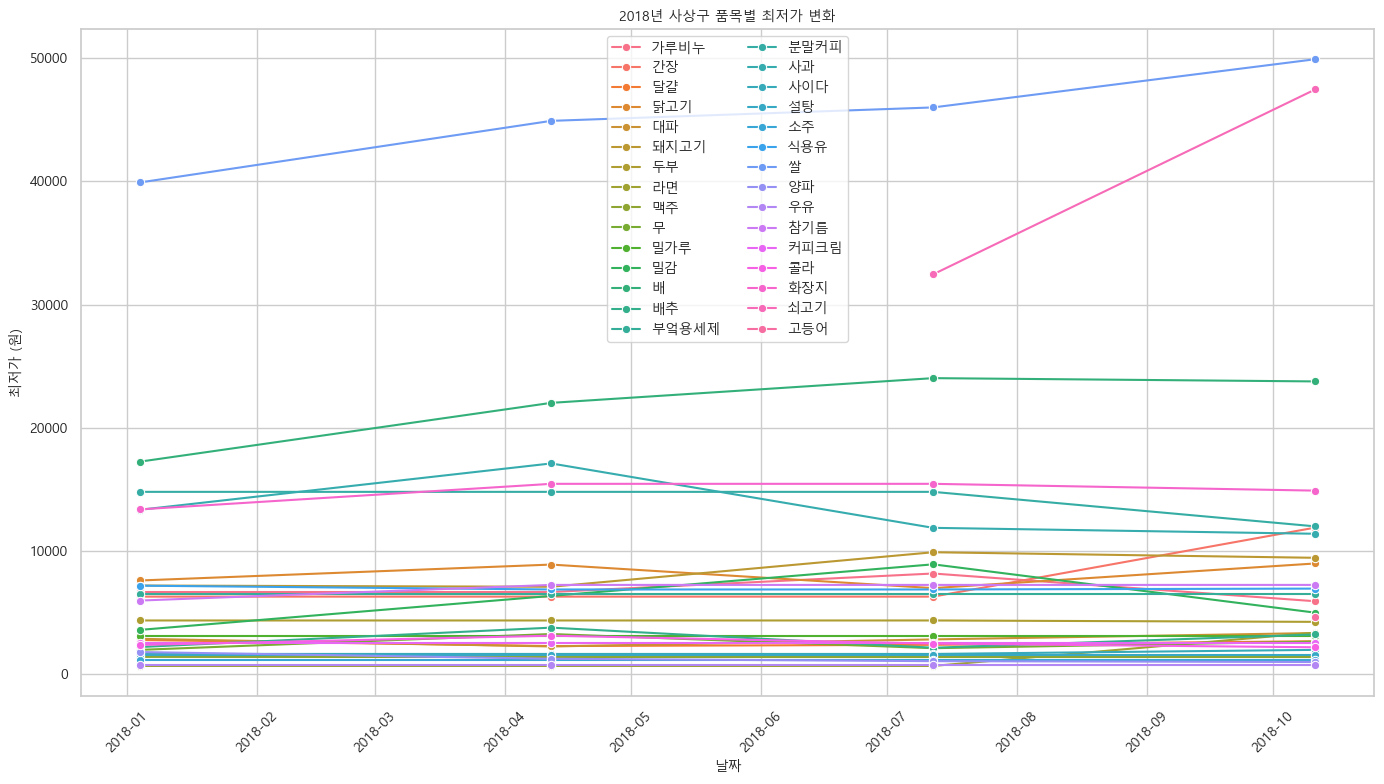

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2018_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2018_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2018_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2018_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2018ÎÖÑ ÏÇ¨ÏÉÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÏÉÅÍµ¨2018_min.csv", index=False, encoding="utf-8-sig")

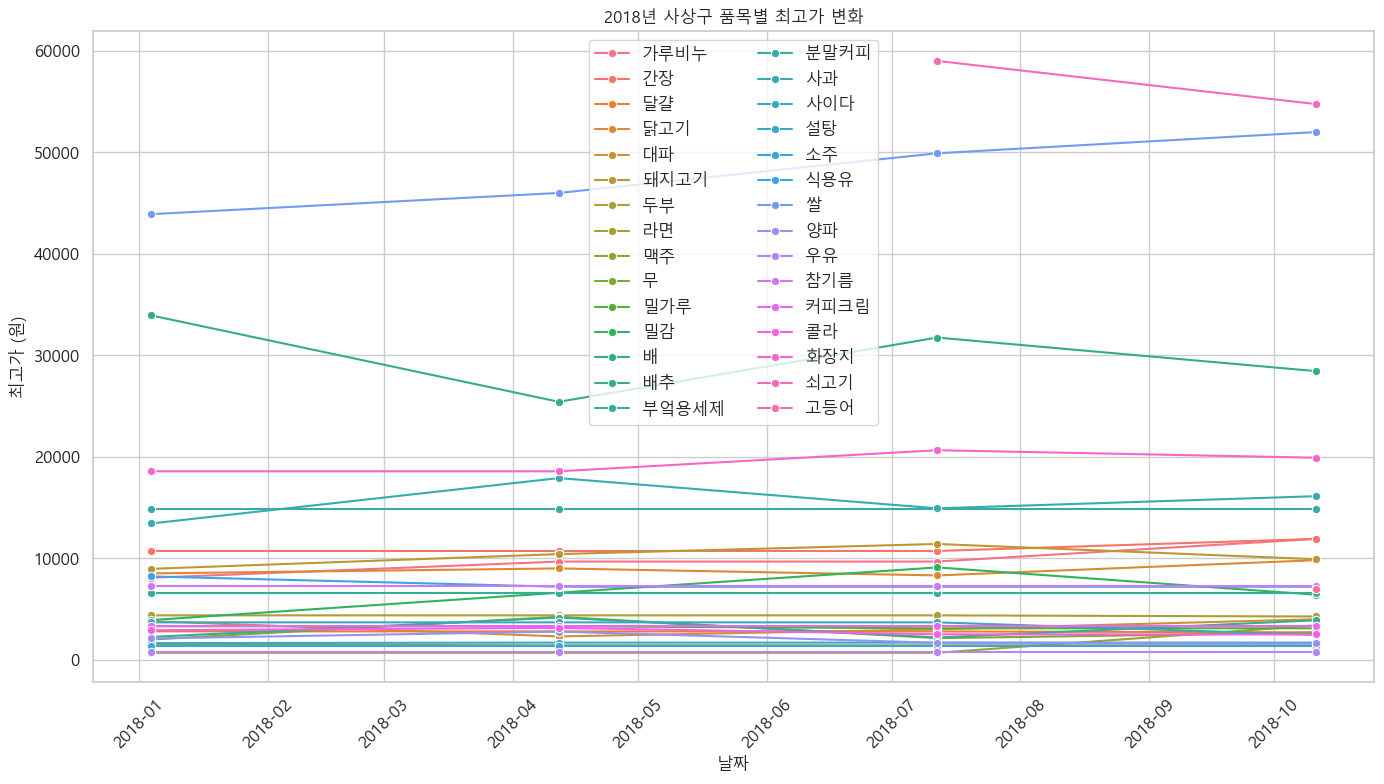

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2018_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2018_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2018_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2018_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2018ÎÖÑ ÏÇ¨ÏÉÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÏÉÅÍµ¨2018_max.csv", index=False, encoding="utf-8-sig")